# Radial Distribution Function

*4/4/2022 Leif Denby*

The aim of this notebook is to develop some tests for the radial distribution function calculation, and to check its results against `rdfpy`

In [1]:
import cloudmetrics
from cloudmetrics.utils.synthetic_data import modified_poisson_disk_sampling
import rdfpy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 500  # size of domain
r0 = 15.0  # distance between points
r_sigma = 0.2  # noise in distance between points
_, coords, _ = modified_poisson_disk_sampling(N=N, r0=r0, r_sigma=r_sigma)
# coords = np.random.uniform(0.0, N, size=(2500, 2))

In [3]:
dr = 1.0
dist_cutoff = 0.3
g_r, radii = rdfpy.rdf(coords, dr=dr, rcutoff=dist_cutoff)
g_r__cm, radii__cm = cloudmetrics.objects.metrics.rdf.pair_correlation_2d(
    pos=coords,
    dist_cutoff=dist_cutoff,
    dr=dr,
    periodic_domain=True,
    domain_shape=(N, N),
)

# the original cloudmetrics code uses centered bins
g_r__cm = g_r__cm
radii__cm = radii__cm - dr / 2.0

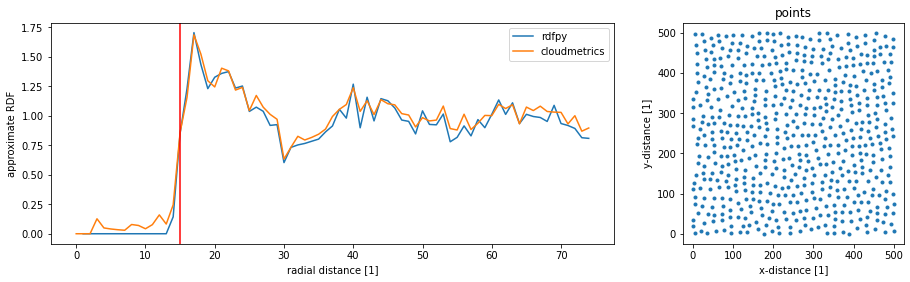

In [4]:
mosaic = """
aaB
aaB
"""
fig, axes = plt.subplot_mosaic(mosaic, figsize=(13, 4))

ax = axes["a"]
ax.plot(radii, g_r, label="rdfpy")
ax.plot(radii__cm, g_r__cm, label="cloudmetrics")
ax.legend()
ax.axvline(r0, color="red")
ax.set_xlabel("radial distance [1]")
ax.set_ylabel("approximate RDF")

ax = axes["B"]
ax.scatter(*coords.T, marker=".")
ax.set_aspect(1)
ax.set_xlabel("x-distance [1]")
ax.set_ylabel("y-distance [1]")
ax.set_title("points")

fig.tight_layout()
fig.savefig("rdf_example.png")